# ¿Qué es Gradio?

Gradio es una biblioteca de Python que permite crear interfaces web interactivas para modelos de Machine Learning, funciones de datos y otras aplicaciones con pocas líneas de código. Es ideal para prototipar y compartir tus modelos de manera rápida y eficiente.


# ¿Por qué usar Gradio?

- Simplicidad: Puedes construir interfacez funcionales con pocas líneas de código, y no requiere de conocimientos en desarrollo web.

- Soporte versátil: Soporta múltiples tipos de inputs/outputs. Como Texto, imágenes, Audio, Video, DataFrames, etc.

- Integración sencilla: Compatible con frameworks populares como TensorFlow, PyTorch y Sklearn.


- Compartir con facilidad: Genera enlaces públicos mediante HuggingFace para compartir tu aplicación sin configuraciones complejas.

- Flexible: Ideal tanto para prototipos rápidos como para aplicaciones más elaboradas.


# ¿Cómo instalar e importar Gradio?

In [ ]:
%pip install gradio

In [4]:
import gradio as gr 
import numpy as np
import pandas as pd
import pickle

# Enfoques de Gradio para Construir Interfaces de Usuario

Gradio ofrece dos enfoques principales para construir interfaces de usuario: `gr.Interface` y `gr.Blocks`, cada uno con diferentes niveles de control y complejidad.

1. `gr.Interface`
- **Sencillo y fácil de usar**
- Ideal para demos rápidas o prototipos
- Menos código necesario
- Estructura predefinida, con control limitado sobre el diseño y flujo de datos
- Solo defines los componentes de entrada y salida, y Gradio organiza automáticamente el diseño básico

2. `gr.Blocks`
- **Control total sobre el diseño**
- Permite construir interacciones personalizadas y flujos de trabajo complejos
- Requiere más conocimiento de Gradio y más código
- Ideal para interfaces más avanzadas y aplicaciones interactivas

## gr.Interface

Es una abstracción de alto nivel en Gradio que te permite crear rápidamente una demo para cualquier función de Python, simplemente especificando los tipos de entrada y los tipos de salida.



In [ ]:
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch()

- `fn`: la función que envuelves con la interfaz de usuario (UI).

- `inputs`: los componentes de Gradio que se utilizarán para la entrada. El número de componentes debe coincidir con el número de argumentos de tu función.

- `outputs`: los componentes de Gradio que se utilizarán para la salida. El número de componentes debe coincidir con el número de valores de retorno de tu función.


### Componentes de Entrada y Salida en Gradio

Entrada:
- **Texto**: Caja de texto para entrada libre (gr.Textbox)
- **Número**: Control deslizante para entrada numérica (gr.Slider) o caja de texto para números (gr.Number)
- **Checkbox**: Casillas para selección booleana o categórica (gr.Checkbox, gr.Radio)
- **Dropdown**: Menú desplegable para seleccionar opciones (gr.Dropdown)
- **Imagen**: Subida de imágenes (gr.Image)
  - Array Numpy con dimensiones (alto, ancho, 3).
  - Usa `type="filepath"` para recibir una ruta de archivo
- **Audio**: Subida de archivos de audio (gr.Audio)
- **Video**: Subida de archivos de video (gr.Video)

Salida:
- **Texto**: Muestra texto plano (gr.Text)
- **Etiqueta**: Muestra texto con formato adicional (gr.Label)
- **Imagen**: Muestra imágenes (gr.Image, gr.Gallery)
- **Gráfico**: Genera gráficos de líneas, dispersión, calor, etc. (gr.Plot)
- **Audio**: Reproduce audio (gr.Audio)
- **HTML**: Muestra contenido HTML (gr.HTML)




### Ejercicio:

Crea tu propia calculadora básica utilizando gr.Interface. Utiliza la imagen a continuación como referencia para la funcionalidad de tu interfaz.

Como ayuda, te proporcionamos una función `calculadora` que, al recibir dos números y una operación matemática, devuelve el resultado correspondiente.

![ej1-gradio.png](images/ej1-gradio.png)




In [23]:
def calculadora(num1, operacion, num2):
    if operacion == "sumar":
        return num1 + num2
    elif operacion == "restar":
        return num1 - num2
    elif operacion == "multiplicar":
        return num1 * num2
    elif operacion == "dividir":
        if num2 == 0:
            raise gr.Error("¡No se puede dividir por cero!")
        return num1 / num2


# ESCRIBE TU CÓDIGO AQUÍ

**Pulsa dos veces aquí para ver la solución**
<!-- 


demo = gr.Interface(
    calculadora,
    [
        gr.Number(), 
        gr.Radio(["sumar", "restar", "multiplicar", "dividir"]),
        gr.Number()
    ],
    gr.Number(),
    title="Calculadora de juguete",
    description="Permite realizar cálculos como 3+2=5",
)

demo.launch()
-->


### Componentes adicionales en Gradio


- **Archivo**: Subida de cualquier tipo de archivo (gr.File)
- **Código**: Muestra y permite editar fragmentos de código (gr.Code)
- **JSON**: Muestra y permite editar datos JSON (gr.JSON)
- **Galería**: Muestra imágenes o videos en una cuadrícula, con opción de visualización a alta resolución (gr.Gallery)
- **DataFrame**: Muestra una tabla de valores, similar a una hoja de cálculo, para entrada o salida de datos (gr.DataFrame)


# Agregar ejemplos en Gradio​

Puedes proporcionar datos de ejemplo que los usuarios pueden cargar fácilmente en la interfaz. Esto es útil para mostrar los tipos de entradas que el modelo espera y explorar tu conjunto de datos junto con el modelo.​

In [2]:
import gradio as gr 
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
    # Añadir ejemplos
    examples=[
        ["Alice", 3],  
        ["Bob", 5],   
        ["Charlie", 1],
        ["Dana", 7],
    ],
  
)

demo.launch()

c:\Users\PC\Documents\charla-10-12-2024\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Ejercicio:

Añade ejemplos predefinidos a tu calculadora de juguete. Proporciona algunos casos de prueba que el usuario pueda seleccionar para realizar cálculos rápidamente.

![ej2-gradio.png](images/ej2-gradio.png)


In [27]:
def calculadora(num1, operacion, num2):
    if operacion == "sumar":
        return num1 + num2
    elif operacion == "restar":
        return num1 - num2
    elif operacion == "multiplicar":
        return num1 * num2
    elif operacion == "dividir":
        if num2 == 0:
            raise gr.Error("¡No se puede dividir por cero!")
        return num1 / num2


demo = gr.Interface(
    calculadora,
    [
        gr.Number(), 
        gr.Radio(["sumar", "restar", "multiplicar", "dividir"]),
        gr.Number()
    ],
    gr.Number(),
    title="Calculadora de juguete",
    description="Permite realizar cálculos como 3+2=5",
    # Añade a esta interfaz los ejemplos
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7883

To create a public link, set `share=True` in `launch()`.


**Pulsa dos veces para ver la solución**


<!-- 

def calculadora(num1, operacion, num2):
    if operacion == "sumar":
        return num1 + num2
    elif operacion == "restar":
        return num1 - num2
    elif operacion == "multiplicar":
        return num1 * num2
    elif operacion == "dividir":
        if num2 == 0:
            raise gr.Error("¡No se puede dividir por cero!")
        return num1 / num2

demo = gr.Interface(
    calculadora,
    [
        gr.Number(), 
        gr.Radio(["sumar", "restar", "multiplicar", "dividir"]),
        gr.Number()
    ],
    gr.Number(),
    title="Calculadora de juguete",
    description="Permite realizar cálculos como 3+2=5",
    examples = [
            [5, "sumar", 3],
            [4, "dividir", 2],
            [-4, "multiplicar", 2.5],
            [0, "restar", 1.2],
        ]
)

demo.launch() 

-->

## gr.Blocks

Es una abstracción de alto nivel en Gradio que te permite crear rápidamente una demo para cualquier función de Python, simplemente especificando los tipos de entrada y los tipos de salida.​

In [6]:
# Código hecho haciendo uso de gr.Interface
import gradio as gr 
def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"]
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [ ]:
# Código hecho haciendo uso de gr.Blocks

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

with gr.Blocks() as demo:
    with gr.Row():
        # Columna para los inputs y botones
        with gr.Column():
            name_input = gr.Textbox(label="Name")
            intensity_input = gr.Slider(minimum=1, maximum=100, step=1, label="Intensity")

            with gr.Row():
                clear_button = gr.Button("Clear")
                submit_button = gr.Button("Submit")
                
        
        # Columna para el output
        with gr.Column():
            output_text = gr.Textbox(label="Greeting")
    
    # Definir las acciones
    submit_button.click(fn=greet, inputs=[name_input, intensity_input], outputs=output_text)
    clear_button.click(fn=lambda: [None,None,None], inputs=[], outputs=[name_input, intensity_input, output_text])

demo.launch()

* Running on local URL:  http://127.0.0.1:7877

To create a public link, set `share=True` in `launch()`.


### Columnas y jerarquización​

Los components dentro de un gr.Column se alinean verticalmente uno sobre otro.​

Para layouts más complejos, las columnas suelen anidarse dentro de gr.Row, logrando estructuras horizontales y flexibles.

In [32]:
with gr.Blocks() as demo:
    with gr.Row():
        text1 = gr.Textbox(label="t1")
        slider2 = gr.Textbox(label="s2")
        drop3 = gr.Dropdown(["a", "b", "c"], label="d3")
    with gr.Row():
        with gr.Column(scale=1, min_width=600):
            text1 = gr.Textbox(label="prompt 1")
            text2 = gr.Textbox(label="prompt 2")
            inbtw = gr.Button("Between")
            text4 = gr.Textbox(label="prompt 1")
            text5 = gr.Textbox(label="prompt 2")
        with gr.Column(scale=2, min_width=600):
            img1 = gr.Image("images/cheetah.jpg")
            btn = gr.Button("Go")

demo.launch()

* Running on local URL:  http://127.0.0.1:7888

To create a public link, set `share=True` in `launch()`.


### Entradas de una función mediante listas o diccionarios​

Al definir funciones que toman múltiples entradas en Gradio, puedes elegir cómo manejar los valores:​​

1. Como una lista de argumentos.​

2. Como un único diccionario de valores (clave: componente).

In [33]:
with gr.Blocks() as demo:
    a = gr.Number(label="a")
    b = gr.Number(label="b")
    with gr.Row():
        add_btn = gr.Button("Sumar")
        sub_btn = gr.Button("Restar")
    c = gr.Number(label="Resultado")

    # Usando Lista de Argumentos
    def add(num1, num2):
        return num1 + num2
    add_btn.click(add, inputs=[a, b], outputs=c)

    # Usando Diccionario de Valores
    def sub(data):
        return data[a] - data[b]
    sub_btn.click(sub, inputs={a, b}, outputs=c)

demo.launch()

* Running on local URL:  http://127.0.0.1:7889

To create a public link, set `share=True` in `launch()`.


### Eventos y métodos en componentes de Gradio

Los eventos en Gradio son acciones del usuario (como clics, cambios de valores, o envío de datos) que desencadenan funciones personalizadas, permitiendo que la interfaz sea interactiva y dinámica.​

#### .click()

- **Descripción**: Responde a clics del usuario.
- **Uso típico**: Botones
- **Ejemplo**:

```python
boton.click(fn=accion, inputs=None, outputs=salida)
```

#### .change()

- **Descripción**: Detecta cambios en los valores de un componente.
- **Uso típico**: Textbox, Dropdown, Slider, Checkbox.
- **Ejemplo**:

```python
slider.change(fn=actualizar, inputs=slider, outputs=resultado)
```

#### .update()

- **Descripción**: Permite modificar dinámicamente propiedades del componente como valor, visibilidad o habilitación.
- **Uso típico**: Compatible con todos los componentes.
- **Ejemplo**:

```python
componente.update(value="Nuevo valor", visible=True)
```

#### .submit()

- **Descripción**: Maneja envíos de datos, generalmente con la tecla Enter en componentes de entrada.
- **Uso típico**: Textbox, Formularios.
- **Ejemplo**:

```python
textbox.submit(fn=procesar_texto, inputs=textbox, outputs=resultado)
```

### Ejercicio

Construye la misma calculadora de juguete, pero en lugar de usar gr.Interface usar gr.Blocks.
Sin ejemplos.

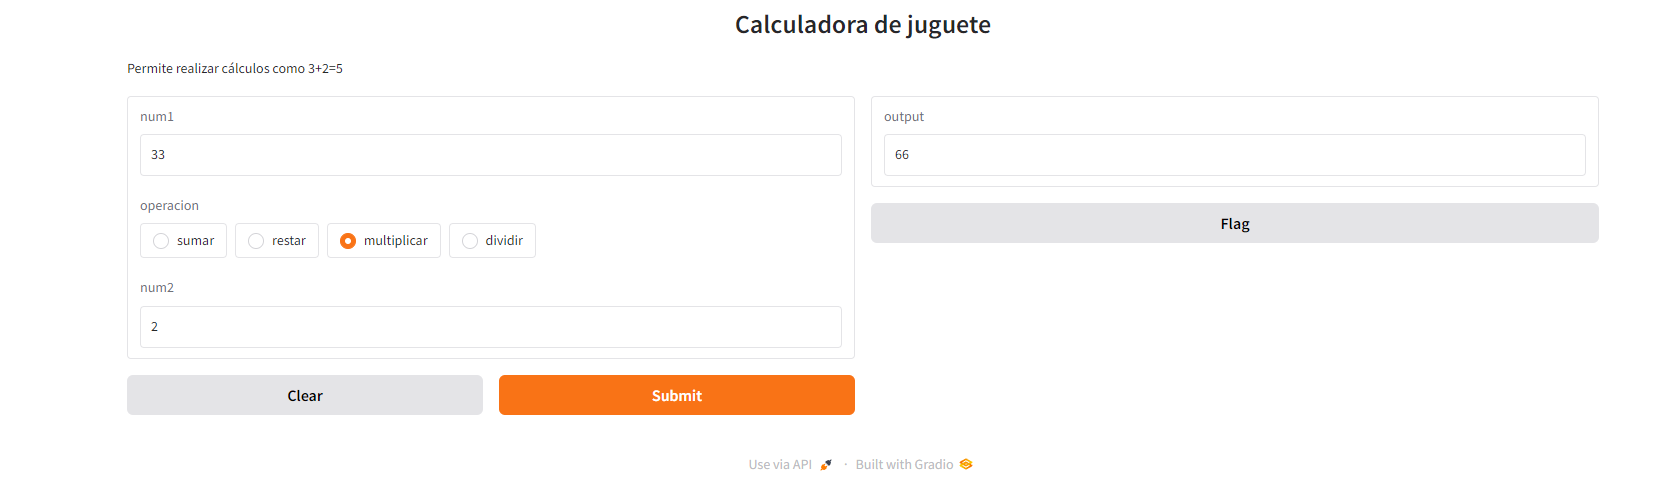

In [ ]:
def calculadora(num1, operacion, num2):
    if operacion == "sumar":
        return num1 + num2
    elif operacion == "restar":
        return num1 - num2
    elif operacion == "multiplicar":
        return num1 * num2
    elif operacion == "dividir":
        if num2 == 0:
            raise gr.Error("¡No se puede dividir por cero!")
        return num1 / num2


# Escribe tu código aquí

**Pulsa dos veces para ver la solución**

<!-- 

with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            num_1 = gr.Number(value=4, label="Número 1")
            operacion = gr.Radio(["sumar", "restar", "multiplicar", "dividir"], label="Operación")
            num_2 = gr.Number(value=0, label="Número 2")

            with gr.Row():
                clear_button = gr.Button(value="Clear")
                boton_calcular = gr.Button(value="Calcular")
        with gr.Column():
            resultado = gr.Number(label="Resultado")

    boton_calcular.click(
        calculadora, inputs=[num_1, operacion, num_2], outputs=[resultado], api_name=False
    )

    clear_button.click(fn=lambda: [None,None,None,0], inputs=[], outputs=[num_1, operacion, num_2,resultado])


    # ejemplos = gr.Examples(
    #     examples=[
    #         [5, "sumar", 3],
    #         [4, "dividir", 2],
    #         [-4, "multiplicar", 2.5],
    #         [0, "restar", 1.2],
    #     ],
    #     inputs=[num_1, operacion, num_2],
    # )

if __name__ == "__main__":
    demo.launch()
    
-->


### gr.Tabs

- Las pestañas (Tabs) se crean usando el contexto `with gr.Tab('nombre_tab’):`​
   
- Los componentes dentro de ese contexto aparecen únicamente en la pestaña correspondiente.​

- Las pestañas consecutivas se agrupan, permitiendo mostrar solo los componentes de una pestaña seleccionada.​

In [41]:
def flip_text(x):
    return x[::-1]

def flip_image(x):
    return np.fliplr(x)

with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Flip Text"):
        text_input = gr.Textbox()
        text_output = gr.Textbox()
        text_button = gr.Button("Flip")
    with gr.Tab("Flip Image"):
        with gr.Row():
            image_input = gr.Image()
            image_output = gr.Image()
        image_button = gr.Button("Flip")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

demo.launch()


* Running on local URL:  http://127.0.0.1:7897

To create a public link, set `share=True` in `launch()`.


# Hot Reloading

Si en lugar de un notebook, estuviéramos en un fichero `app.py`. Para ejecutar tu app en tu máquina local de modo que se recargue automáticamente cuando realizas cambios en tu fichero  .py utilizar el siguiente comando:​

`gradio app.py`

# Compartir tu aplicación Gradio​

Existen diversas formas de compartir tu aplicación Gradio. La opción más sencilla es añadir el parámetro share=True dentro de la función launch(), lo que generará un enlace público que estará disponible durante 72 horas, permitiéndote compartirlo de forma rápida y sencilla.​

In [17]:
import numpy as np
import gradio as gr

def flip_text(x):
    return x[::-1]

def flip_image(x):
    return np.fliplr(x)

with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Flip Text"):
        text_input = gr.Textbox()
        text_output = gr.Textbox()
        text_button = gr.Button("Flip")
    with gr.Tab("Flip Image"):
        with gr.Row():
            image_input = gr.Image()
            image_output = gr.Image()
        image_button = gr.Button("Flip")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
    image_button.click(flip_image, inputs=image_input, outputs=image_output)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7865

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Otras alternativas incluyen hospedar tu demo de forma permanente en Hugging Face Spaces, convertir tu aplicación en una API para integrarla con otros sistemas o embeberla en una página web utilizando IFrames.​

# Cómo aplicar esto a un modelo de Machine Learning

En este ejercicio, vamos a crear una interfaz de usuario interactiva utilizando Gradio para nuestro modelo de predicción de supervivencia del Titanic. Ya tenemos el modelo cargado y la función de predicción definida. Tu tarea es completar el código para crear la interfaz de Gradio.

Sigue estos pasos:

1. Importa la biblioteca Gradio.
2. Crea una interfaz Gradio utilizando `gr.Interface()`.
3. Define los inputs necesarios (clase, sexo, edad, etc.) utilizando los componentes apropiados de Gradio.
4. Establece la función `predict_survival` como la función de predicción.
5. Configura la salida para mostrar el resultado de la predicción.
6. Añade un título y una descripción a la interfaz.
7. Incluye algunos ejemplos predefinidos para que los usuarios puedan probar rápidamente.
8. Lanza la interfaz con el método `launch()`.

Recuerda que puedes personalizar la apariencia y el comportamiento de la interfaz según tus preferencias. ¡Buena suerte!

In [16]:
with open('classification_model.pkl', 'rb') as file:
    model = pickle.load(file)

def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    if age > 100:
        raise gr.Error("La edad no puede ser mayor a 100 años.")
    
    data = pd.DataFrame([[pclass, sibsp, parch, age, fare, sex]],
                        columns=['pclass', 'sibsp', 'parch','age_fill', 'fare_fill', 'sex_level'])
    data["sex_level"] = data["sex_level"].map({"male": 0, "female": 1})
    data["embarked_Q"] = 1 if embarked == "Q" else 0
    data["embarked_S"] = 1 if embarked == "S" else 0
    prediction = model.predict(data)
    return "Sobrevive" if prediction[0] == 1 else "No sobrevive"

# Escribe tu código aquí

**Pulsa dos veces aquí para ver la solución**


<!-- # Cargar el modelo
with open('classification_model.pkl', 'rb') as file:
    model = pickle.load(file)

def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    if age > 100:
        raise gr.Error("La edad no puede ser mayor a 100 años.")
    
    data = pd.DataFrame([[pclass, sibsp, parch, age, fare, sex]],
                        columns=['pclass', 'sibsp', 'parch','age_fill', 'fare_fill', 'sex_level'])
    data["sex_level"] = data["sex_level"].map({"male": 0, "female": 1})
    data["embarked_Q"] = 1 if embarked == "Q" else 0
    data["embarked_S"] = 1 if embarked == "S" else 0
    prediction = model.predict(data)
    return "Sobrevive" if prediction[0] == 1 else "No sobrevive"

demo = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Dropdown(["1", "2", "3"], label="Clase"),
        gr.Radio(["male", "female"], label="Sexo"),
        gr.Number(label="Edad", minimum=0, maximum=100),
        gr.Slider(0, 8, step=1, label="SibSp"),
        gr.Slider(0, 6, step=1, label="Parch"),
        gr.Slider(0, 512.3292, label="Tarifa"),
        gr.Dropdown(["Q", "S"], label="Puerto de embarque")
    ],
    outputs=gr.Text(label="Predicción"),
    title="Predictor de Supervivencia del Titanic",
    description="Ingrese los datos de un pasajero para predecir si sobreviviría o no al hundimiento del Titanic.",
    examples=[
        ["1", "female", 29, 0, 0, 211.3375, "S"],  # Ejemplo de superviviente
        ["3", "male", 45, 0, 0, 8.05, "S"]  # Ejemplo de no superviviente
    ]
)

demo.launch() -->